Length of index is 90


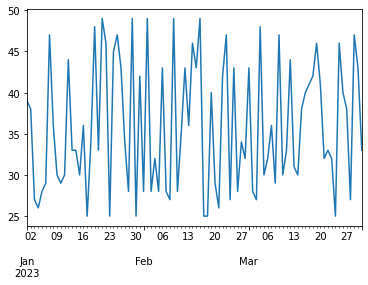

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We are analyzing sales of an ice-cream spot. Let's generate a series of sales numbers (number of items sold each day) for some time period:
start_date = "Jan 1, 2023"
end_date = "Mar 31, 2023"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot()
# We can create another series, indexed by week, to additional 10 packs of ice-cream for a party:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))

In [8]:
#We can create another series, indexed by week, to additional 10 packs of ice-cream for a party:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(additional_items)

2023-01-01    10
2023-01-08    10
2023-01-15    10
2023-01-22    10
2023-01-29    10
2023-02-05    10
2023-02-12    10
2023-02-19    10
2023-02-26    10
2023-03-05    10
2023-03-12    10
2023-03-19    10
2023-03-26    10
Freq: W-SUN, dtype: int64


2023-01-01    49.0
2023-01-02    38.0
2023-01-03    27.0
2023-01-04    26.0
2023-01-05    28.0
              ... 
2023-03-27    38.0
2023-03-28    27.0
2023-03-29    47.0
2023-03-30    43.0
2023-03-31    33.0
Length: 90, dtype: float64


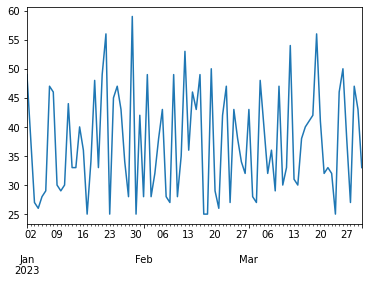

In [10]:
# we add two series together, we get total number:
total_items = items_sold.add(additional_items,fill_value=0)
total_items.plot()
print (total_items)

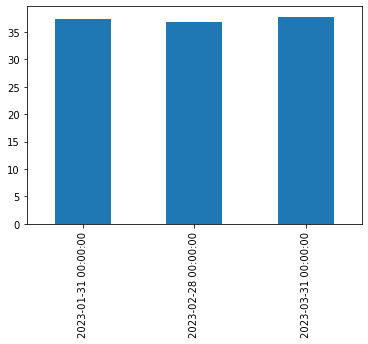

In [11]:
# to compute mean sales volume monthly
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar')


In [17]:
# Data frame a collection of series with the same index. We can combine several series together into a DataFrame:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","play","games","and","will","not","change"],index=range(0,9))
df = pd.DataFrame([a,b])
print (df)

   0     1   2     3      4    5     6    7       8
0  1     2   3     4      5    6     7    8       9
1  I  like  to  play  games  and  will  not  change


In [19]:
# A Series can be use as columns, and specify column names using dictionary as shown in example below:
df = pd.DataFrame({ 'A' : a, 'B' : b })
print (df)

   A       B
0  1       I
1  2    like
2  3      to
3  4    play
4  5   games
5  6     and
6  7    will
7  8     not
8  9  change


In [22]:
# Creating new computable columns using intuitive expression.
df['DivA'] = df['A']-df['A'].mean() 
print (df)

   A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4    play  -1.0
4  5   games   0.0
5  6     and   1.0
6  7    will   2.0
7  8     not   3.0
8  9  change   4.0


In [23]:
# Selecting rows based on numbers using iloc construct. For example, we can select first 5 rows from our DataFrame above:
df.iloc[:5]

,A,B,DivA
0,1,I,-4.0
1,2,like,-3.0
2,3,to,-2.0
3,4,play,-1.0
4,5,games,0.0


In [29]:
# Estimation of COVID-19 Pandemic
# Loading Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [30]:
infected

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [32]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# downloading a time-series data on global COVID-19 deaths and the other containing a lookup table for country codes. the corresponding CSV files using functions such as pd.read_csv() from the pandas library.
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [34]:
# different values that are present in Province/State column Shows that countries like Australia and China have more detailed breakdown by provinces.:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Saint Pierre and Miquelon       1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Gansu                           1
Fujian                          1
Chongqing                       1
Beijing                         1
Turks and Caicos Islands        1
Name: Province/State, Length: 91, dtype: int64

In [35]:
# China's detailed breakdown by provinces. 
infected[infected['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


In [36]:
# Pre-processing Data using Groupby
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


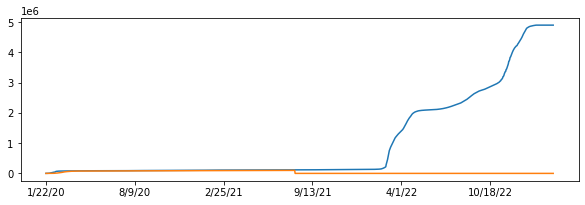

In [41]:
# Accessing data for a specific country by using .loc:|
infected.loc['China'][2:].plot()
recovered.loc['China'][2:].plot()
plt.show()

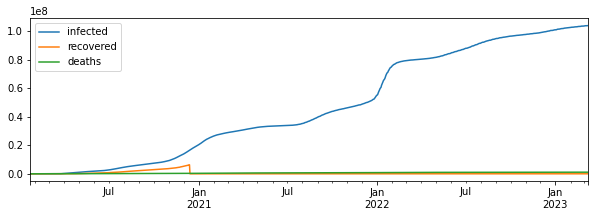

In [49]:
df.plot()
plt.show()

In [61]:
# computing the number of new infected people each day using 


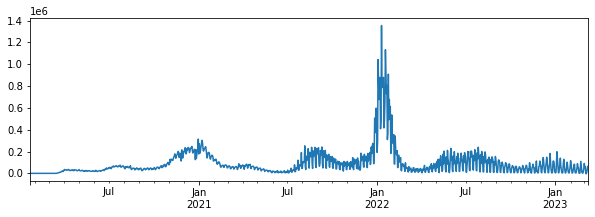

In [65]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

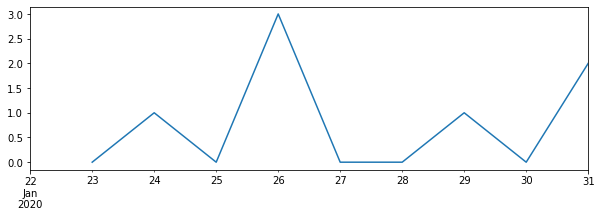

In [66]:
df[(df.index.year==2020) & (df.index.month==1)]['ninfected'].plot()
plt.show()

In [67]:
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [68]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
915,840,US,USA,840.0,NaN,NaN,NaN,US,40.0,-100.0,US,329466283.0


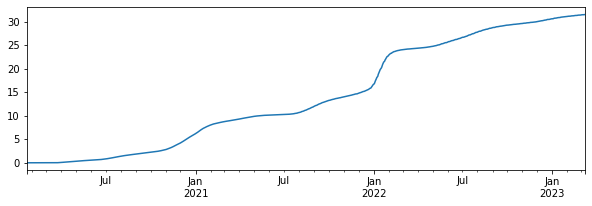

In [69]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

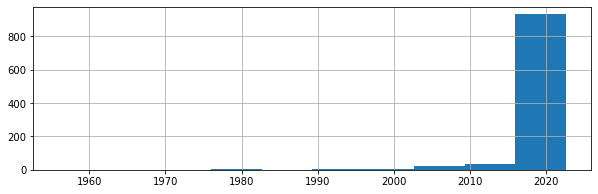

In [71]:
# Analyzing COVID-19 Papers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read the csv
df = pd.read_csv("./metadata.csv")
# how manu rows or record do we have?
df.shape[0]
df
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

In [72]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


In [73]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

,Name,Count
3,remdesivir,12
7,dexamethasone,12
0,hydroxychloroquine,7
4,azithromycin,6
1,chloroquine,3
2,tocilizumab,2
5,lopinavir,1
8,heparin,1
9,favipiravir,1
6,ritonavir,0


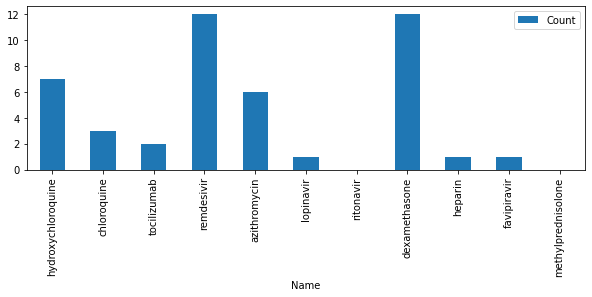

In [75]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

In [76]:
# Looking for Trends in Treatment Strategy
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                              1            0            0   
             2                              0            0            0   
             3                              0            0            0   
             4                              0            0            0   
             5                              0            0            0   
             6                              0            0            0   
             7                              3            3            0   
             8                              0            0            2   
             9                              0            0            0   
             10                             0            0            0   
             11                             0            0            0   
             12                             0            0            0   
2021         1                              2            0            0   
             2                              0            0            0   
             3                              0            0            0   
             4                              0            0            0   
             5                              0            0            0   
             6                              0            0            0   
             7                              0            0            0   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                      0             0          0          0   
             2                      0             0          0          0   
             3                      0             0          0          0   
             4                      0             0          0          0   
             5                      0             0          0          0   
             6                      9             0          0          0   
             7                      0             5          0          0   
             8                      0             0          0          0   
             9                      0             0          1          0   
             10                     0             0          0          0   
             11                     0             0          0          0   
             12                     0             0          0          0   
2021         1                      3             0          0          0   
             2                      0             0          0          0   
             3                      0             0          0          0   
             4                      0             0          0          0   
             5                      0             0          0          0   
             6                      0             0          0          0   
             7                      0             0          0          0   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                         0        0            0   
             2                         0        0            0   
             3                         0        0            0   
             4                         0        1            0   
             5                         0        0            0   
             6                         0        0            0   
             7                         0        0            0   
             8                         0        0            0   
             9                         0        0            1   
             10                        0        0            0   
             11                        0 

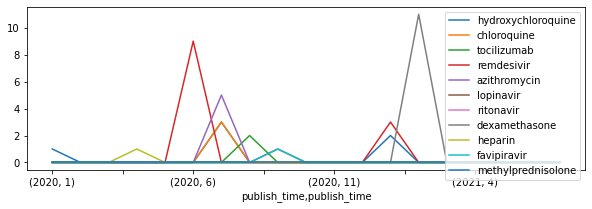

In [77]:
dfmt.plot()
plt.show()

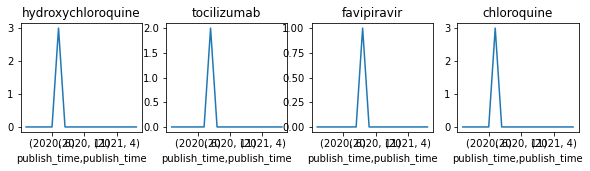

In [80]:
# let's visualize just a few medicines.
meds = ['hydroxychloroquine','tocilizumab','favipiravir', 'chloroquine']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,2))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

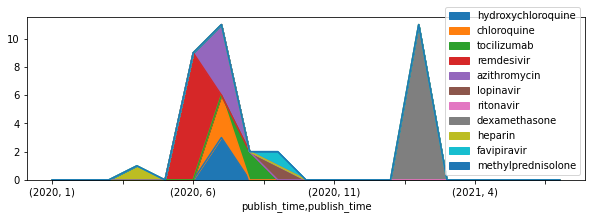

In [81]:
# visualizing using stack plot (or area plot in Pandas terminology):
dfmt.plot.area()
plt.show()

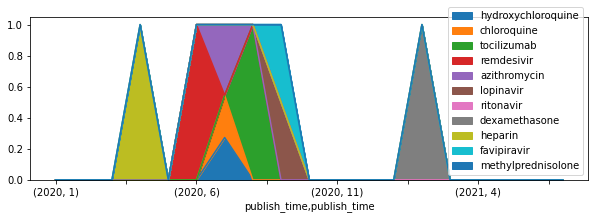

In [82]:
# computing relative popularity in percents
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

In [85]:
# Computing Medicine-Diagnosis Correspondence
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1


In [86]:
m

array([[4., 3., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [2., 2., 1., 2., 0., 1., 0.],
       [2., 1., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

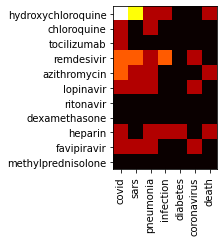

In [87]:
# mitrix visualization using heatmap
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()